In [31]:
import sys
sys.path.append("./../../src")
from visualizer_helper import Visualizer

import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import preprocessing
from scipy.sparse import csr_matrix
import scipy
import pickle
import os
from annoy import AnnoyIndex
from scipy.sparse.linalg import inv
import hdbscan

k_neighbors = 100
evecs = 50

A = pickle.load(open("./data/A_mknn_K{}_CSR.p".format(k_neighbors), "rb"))

D = pickle.load(open("./data/D_mknn_K{}_CSR.p".format(k_neighbors), "rb"))
D_mc = pickle.load(open("./data/D_mc_mknn_K{}_CSR.p".format(k_neighbors), "rb"))

D_inv_sqrt = pickle.load(open("./data/D_mknn_inv_sqrt_K{}_CSR.p".format(k_neighbors), "rb"))
D_mc_inv_sqrt = pickle.load(open("./data/D_mc_mknn_inv_sqrt_K{}_CSR.p".format(k_neighbors), "rb"))

L = pickle.load(open("./data/L_mknn_K{}_CSR.p".format(k_neighbors), "rb"))
L_mc = pickle.load(open("./data/L_mc_mknn_K{}_CSR.p".format(k_neighbors), "rb"))

L_evals = pickle.load(open("./data/L_evals{}_K{}.p".format(evecs, k_neighbors), "rb"))
L_evecs = pickle.load(open("./data/L_evecs{}_K{}.p".format(evecs, k_neighbors), 'rb'))

L_mc_evals = pickle.load(open("./data/L_mc_evals{}_K{}.p".format(evecs, k_neighbors), "rb"))
L_mc_evecs = pickle.load(open("./data/L_mc_evecs{}_K{}.p".format(evecs, k_neighbors), "rb"))

L_evals_svd = pickle.load(open("./data/L_evals_svd{}_K{}.p".format(evecs, k_neighbors), "rb"))
L_evecs_svd = pickle.load(open("./data/L_evecs_svd{}_K{}.p".format(evecs, k_neighbors), 'rb'))

L_mc_evals_svd = pickle.load(open("./data/L_mc_evals_svd{}_K{}.p".format(evecs, k_neighbors), "rb"))
L_mc_evecs_svd = pickle.load(open("./data/L_mc_evecs_svd{}_K{}.p".format(evecs, k_neighbors), "rb"))

In [26]:
A.shape

(44083, 44083)

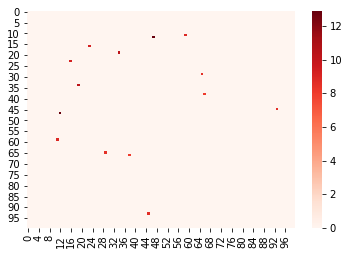

In [27]:
sns.heatmap(A[:100, :100].toarray(), cmap="Reds")

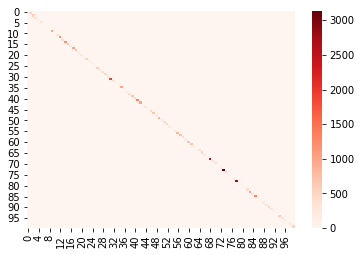

In [28]:
sns.heatmap(D[:100, :100].toarray(), cmap="Reds")

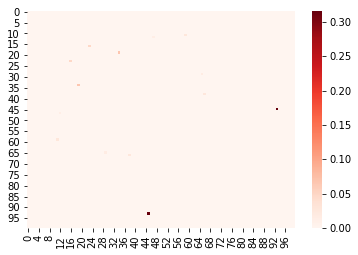

In [30]:
sns.heatmap(L[:100, :100].toarray(), cmap="Reds")

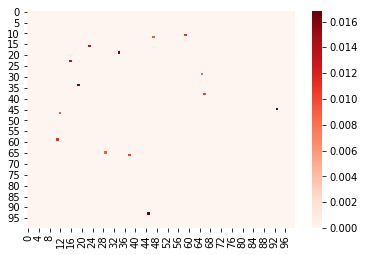

In [19]:
sns.heatmap(L_mc[:100, :100], cmap="Reds")

In [7]:
# L_evals, L_evecs = scipy.sparse.linalg.eigsh(L, k=50, which="LM")
# L_mc_evals, L_mc_evecs = scipy.sparse.linalg.eigsh(L_mc, k=50, which="LM")
# pickle.dump(L_evecs, open("./data/L_evecs50_K{}.p".format(k_neighbors), 'wb'))
# pickle.dump(L_mc_evecs, open("./data/L_mc_evecs50_K{}.p".format(k_neighbors), "wb"))
# pickle.dump(L_evals, open("./data/L_evals50_K{}.p".format(k_neighbors), "wb"))
# pickle.dump(L_mc_evals, open("./data/L_mc_evals50_K{}.p".format(k_neighbors), "wb"))

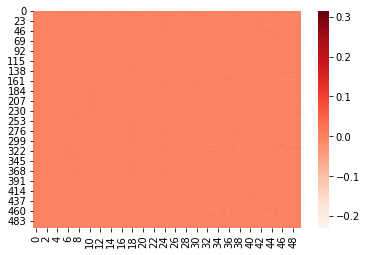

In [35]:
sns.heatmap(L_evecs_svd[:500, :500], cmap="Reds")

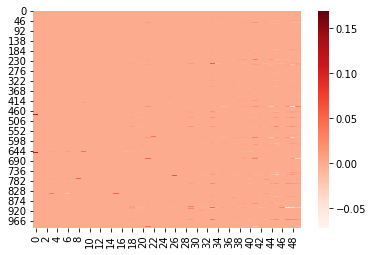

In [34]:
sns.heatmap(L_mc_evecs_svd[:500, :500], cmap="Reds")

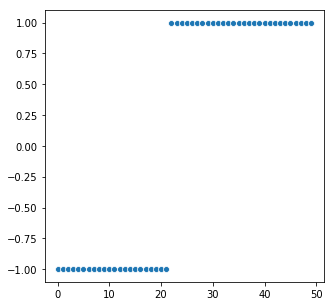

In [22]:
plt.figure(figsize=(5,5))
ax = sns.scatterplot(range(L_evals.shape[0]), L_evals)

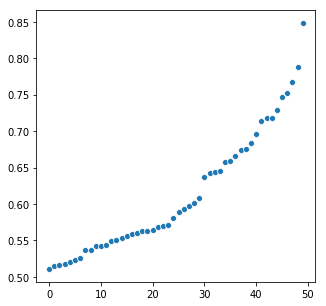

In [10]:
plt.figure(figsize=(5,5))
ax = sns.scatterplot(range(L_evals.shape[0]), L_mc_evals)

In [13]:
def get_evec_df(evecs, top_k_evecs=5):
    k_evecs = evecs[:, -top_k_evecs:]
    evec_cols = ["Evec_{}".format(i) for i in range(top_k_evecs)]
    evec_df = pd.DataFrame(k_evecs, columns=evec_cols)
    return evec_df

evecs_to_plot=20
L_evecdf = get_evec_df(L_evecs, top_k_evecs=evecs_to_plot)
L_mc_evecdf = get_evec_df(L_mc_evecs, top_k_evecs=evecs_to_plot)

print("L Evecs")
print(L_evecdf.describe())
print("")
print("L_mc Evecs")
print(L_mc_evecdf.describe())

L Evecs
             Evec_0        Evec_1        Evec_2        Evec_3        Evec_4  \
count  44083.000000  44083.000000  44083.000000  44083.000000  44083.000000   
mean      -0.000805     -0.000145      0.000069      0.000738      0.000036   
std        0.004694      0.004761      0.004762      0.004705      0.004763   
min       -0.314913     -0.261818     -0.429417     -0.165467     -0.361107   
25%       -0.001048     -0.000180      0.000049      0.000454      0.000039   
50%       -0.000777     -0.000134      0.000071      0.000657      0.000056   
75%       -0.000537     -0.000092      0.000095      0.000886      0.000076   
max        0.274572      0.239486      0.255574      0.399723      0.308796   

             Evec_5        Evec_6        Evec_7        Evec_8        Evec_9  \
count  44083.000000  44083.000000  44083.000000  44083.000000  44083.000000   
mean      -0.000478      0.000334     -0.000804     -0.000623      0.000307   
std        0.004739      0.004751      0.00